# Exercise 2: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `hw2_123456789_987654321.ipynb` if you submitted in pairs and `hw2_123456789.ipynb` if you submitted the exercise alone.
1. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
1. Write your functions in this notebook only. **Do not create Python modules and import them**.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. **Do not import anything else.**
1. Your code must run without errors. Make sure your `numpy` version is at least 1.15.4 and that you are using at least python 3.6. Changes of the configuration we provided are at your own risk. Any code that cannot run will not be graded.
1. Write your own code. Cheating will not be tolerated.
1. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will not be checked.

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Construct a decision tree algorithm.
4. Prune the tree to achieve better results.
5. Visualize your results.

# I have read and understood the instructions: 204502926, 204945323

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Warmup - OOP in python

Our desicion tree will be implemented using a dedicated python class. Python classes are very similar to classes in Java.


You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [2]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [3]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x7fd2bf5a9a10>, <__main__.Node at 0x7fd2bf5a9a90>]

## Data preprocessing

For the following exercise, we will use a dataset containing mushroom data `agaricus-lepiota.csv`. 

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous
one (=there are only two classes **edible** and **poisonous**). 
    
The dataset contains 8124 observations with 22 features:
1. cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
4. bruises: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [4]:
# load dataset
data = pd.read_csv('agaricus-lepiota.csv')

In [5]:
data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,s,s,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,s,s,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,s,s,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,s,s,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,s,s,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,s,s,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,s,s,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,s,s,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,s,k,w,w,p,w,o,e,w,v,l,p


One of the advantages of the Decision Tree algorithm is that almost no preprocessing is required. However, finding missing values is always required.

In [6]:
#############################################################################
# TODO: Find the columns with missing values and remove them from the data.#
#############################################################################
print(f'{data.isnull().values.any()}\n') # if any
print(f'{data.isnull().sum()}\n') # missing values' sum per column
print(f'{data.isnull().sum().sum()}') # overall missing values' sum
# no missing values in data

data = data.dropna()
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

False

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

0


---

We will split the dataset to `Training` and `Testing` datasets.

In [7]:
from sklearn.model_selection import train_test_split
# Making sure the last column will hold the labels
X, y = data.drop('class', axis=1), data['class']
X = np.column_stack([X,y])
# split dataset using random_state to get the same split each time
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (6093, 22)
Testing dataset shape:  (2031, 22)


In [8]:
y.shape

(8124,)

In [9]:
X_train

array([['x', 's', 'y', ..., 'n', 'g', 'e'],
       ['k', 'y', 'e', ..., 'v', 'l', 'e'],
       ['f', 'y', 'n', ..., 'v', 'p', 'p'],
       ...,
       ['x', 'y', 'n', ..., 'v', 'l', 'p'],
       ['k', 's', 'e', ..., 'v', 'l', 'e'],
       ['f', 'y', 'g', ..., 'y', 'p', 'p']], dtype=object)

---

## Impurity Measures

Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Implement the functions `calc_gini` and `calc_entropy`. You are encouraged to test your implementation (10 points).

In [10]:
# Helper functions for this part

def get_probabilities_dict(array):
    '''
    Returns a dictionary with the probabilities for each of the given column-array's unique keys.
    (ex.: {'yes': 0.51, 'no': 0.49})
    '''
    unique, counts = np.unique(array, return_counts=True)
    return dict(zip(unique, counts/sum(counts)))


def calculate_gini_impurity_from_dict(probabilities_dict):
    return 1 - sum(np.square(list(probabilities_dict.values())))


def calculate_entropy_from_dict(probabilities_dict):
    return -sum(p * np.log2(p) for p in list(probabilities_dict.values()))

In [11]:
def calc_gini(data):
    """
    Calculate gini impurity measure of a dataset.
 
    Input:
    - data: any dataset where the last column holds the labels.
 
    Returns the gini impurity.
    """
    gini = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    labels = data[:,-1] # the last column holds the labels
    probabilities = get_probabilities_dict(labels)
    gini = calculate_gini_impurity_from_dict(probabilities)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return gini

In [12]:
def calc_entropy(data):
    """
    Calculate the entropy of a dataset.

    Input:
    - data: any dataset where the last column holds the labels.

    Returns the entropy of the dataset.
    """
    entropy = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    labels = data[:,-1] # the last column holds the labels
    probabilities = get_probabilities_dict(labels)
    entropy = calculate_entropy_from_dict(probabilities)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return entropy

In [13]:
##### Your Tests Here #####
calc_gini(X), calc_entropy(X)

(0.4995636322379775, 0.9993703627906085)

---

## Goodness of Split

Given a feature the Goodnees of Split measures the reduction in the impurity if we split the data according to the feature.
$$
\Delta\varphi(S, A) = \varphi(S) - \sum_{v\in Values(A)} \frac{|S_v|}{|S|}\varphi(S_v)
$$

In our implementation the goodness_of_split function will return either the Goodness of Split or the Gain Ratio as learned in class. You'll control the return value with the `gain_ratio` parameter. If this parameter will set to False (the default value) it will return the regular Goodness of Split. If it will set to True it will return the Gain Ratio.
$$
GainRatio(S,A)=\frac{InformationGain(S,A)}{SplitInformation(S,A)}
$$
Where:
$$
InformationGain(S,A)=Goodness\ of\ Split\ calculated\ with\ Entropy\ as\ the\ Impurity\ function \\
SplitInformation(S,A)=- \sum_{a\in A} \frac{|S_a|}{|S|}\log\frac{|S_a|}{|S|}
$$
NOTE: you can add more parameters to the function and you can also add more returning variables (The given parameters and the given returning variable should not be touch). (10 Points)

In [14]:
# Helper functions for this part

def split(data, value, feature):
    filtered_array = data[data[:,feature] == value][:,-1]
    return get_probabilities_dict(filtered_array)


def calculate_impurity_from_dict(split_data, impurity_criterion):
    if impurity_criterion == 'gini':
        return calculate_gini_impurity_from_dict(split_data)
    else:
        return calculate_entropy_from_dict(split_data)

In [15]:
def goodness_of_split(data, feature, impurity_func, gain_ratio=False):
    """
    Calculate the goodness of split of a dataset given a feature and impurity function.

    Input:
    - data: any dataset where the last column holds the labels.
    - feature: the feature index.
    - impurity_func: a function that calculates the impurity.
    - gain_ratio: goodness of split or gain ratio flag.

    Returns the goodness of split (or the Gain Ratio).
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    if impurity_func == calc_entropy or gain_ratio == True:
        impurity_criterion = 'entropy'
        impurity = calc_entropy(data)
    else:
        impurity_criterion = 'gini'
        impurity = calc_gini(data)

    gain = 0
    len_of_data = data.shape[0]

    feature_values = np.unique(data[:,feature])
    
    for value in feature_values:
        number_of_instances = len(data[data[:,feature] == value])
        split_data = split(data, value, feature)
        # print(split_data, number_of_instances, len_of_data)
        gain += (number_of_instances / len_of_data) * calculate_impurity_from_dict(split_data, impurity_criterion)

    if gain_ratio == False:
        # calculate the impurity of the node (parent) using the impurity_func passed as a parameter (gini or entorpy) and substract the weighted impurity (gini or entropy) of the children.
        goodness = impurity - gain
    else:
        # calculate the information gain specifically with entropy as the impurity function, and divide it by split information.
        information_gain = impurity # just for naming conventions in the formula

        fractions = np.unique(data[:, feature], return_counts=True)[1] / data.shape[0]
        split_information = -(np.log2(fractions) * fractions).sum()
        gain_ratio_value = information_gain / split_information
        goodness = gain_ratio_value
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return goodness

In [16]:
# ##### TESTS #####
# tennis_data = {
#     'day' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
#     'outlook' : ['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast', 'sunny', 'sunny', 'rain', 'sunny', 'overcast', 'overcast', 'rain'],
#     'temperature' : ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'],
#     'humidity' : ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
#     'wind' : ['weak', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'strong'],
#     'playsTennis' : ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
# }

# tennis_data = pd.DataFrame(tennis_data, columns=tennis_data.keys())
# label_column = 'playsTennis'
# A, b = tennis_data.drop([label_column], axis=1), tennis_data[label_column]
# A = np.column_stack([A,b])

# print(A)
# calc_gini(A), calc_entropy(A)
# feature = 0 # 0 is 'day'
# goodness_of_split(A, feature, calc_entropy, False)

In [17]:
def get_goodness_of_split_for_all_features(data, array_of_feature_indices, impurity=calc_gini, gain_ratio=False):
    goodness_of_split_dict = dict()

    for i in array_of_feature_indices:
        goodness_of_split_dict[i] = goodness_of_split(data, i, impurity, gain_ratio)

    return goodness_of_split_dict

In [18]:
# array_of_feature_indices = np.arange(1,5) # [1,2,3,4] excluding the 'day' & 'label' features
# get_goodness_of_split_for_all_features(A, array_of_feature_indices, calc_gini)

---

## Building a Decision Tree

Use a Python class to construct the decision tree. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes categorical data. In this exercise, when splitting a node create the number of children needed according to the attribute unique values.

Complete the class `DecisionNode`. The structure of this class is entirely up to you. 

Complete the function `build_tree`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class. (30 points)

In [19]:
### Chi square table values ###
# The first key is the degree of freedom
# The second key is the p-value cut-off
# The values are the chi-statistic that you need to use in the pruning

chi_table = {1: {0.5 : 0.45,
                 0.25 : 1.32,
                 0.1 : 2.71,
                 0.05 : 3.84,
                 0.0001 : 100000},
             2: {0.5 : 1.39,
                 0.25 : 2.77,
                 0.1 : 4.60,
                 0.05 : 5.99,
                 0.0001 : 100000},
             3: {0.5 : 2.37,
                 0.25 : 4.11,
                 0.1 : 6.25,
                 0.05 : 7.82,
                 0.0001 : 100000},
             4: {0.5 : 3.36,
                 0.25 : 5.38,
                 0.1 : 7.78,
                 0.05 : 9.49,
                 0.0001 : 100000},
             5: {0.5 : 4.35,
                 0.25 : 6.63,
                 0.1 : 9.24,
                 0.05 : 11.07,
                 0.0001 : 100000},
             6: {0.5 : 5.35,
                 0.25 : 7.84,
                 0.1 : 10.64,
                 0.05 : 12.59,
                 0.0001 : 100000},
             7: {0.5 : 6.35,
                 0.25 : 9.04,
                 0.1 : 12.01,
                 0.05 : 14.07,
                 0.0001 : 100000},
             8: {0.5 : 7.34,
                 0.25 : 10.22,
                 0.1 : 13.36,
                 0.05 : 15.51,
                 0.0001 : 100000},
             9: {0.5 : 8.34,
                 0.25 : 11.39,
                 0.1 : 14.68,
                 0.05 : 16.92,
                 0.0001 : 100000},
             10: {0.5 : 9.34,
                  0.25 : 12.55,
                  0.1 : 15.99,
                  0.05 : 18.31,
                  0.0001 : 100000},
             11: {0.5 : 10.34,
                  0.25 : 13.7,
                  0.1 : 17.27,
                  0.05 : 19.68,
                  0.0001 : 100000}}

In [20]:
def get_subtable(data, node, value):
    '''
    Returns subtable where it's only the instances of given value
    ex.: all instances with outlook == 'sunny'
    ''' 
    return data[data[:,node] == value]


def get_frequent_prediction(data):
    '''
    Returns the most frequent *label* from given data
    '''
    l = list(data[:,-1]) # -1 is the last column where the label is
    frequent = max(set(l), key = l.count)
    return frequent


def get_chi_square(data, feature):
    feature_values = np.unique(data[:, feature])
    num_samples = data.shape[0]
    class_pos, class_neg = (data[:, -1] == "p").sum(), (data[:, -1] == "e").sum()
    prob_pos, prob_neg = class_pos / num_samples, class_neg / num_samples
    chi_stat = 0.0

    for value in feature_values:
        subset = (data[:, feature] == value)
        d = subset.sum()
        pos = (subset & (data[:, -1] == "p")).sum()
        neg = d - pos
        E_pos, E_neg = d * prob_pos, d * prob_neg

        chi_stat += ((pos - E_pos)**2 / E_pos) + ((neg - E_neg)**2 / E_neg)

    return chi_stat

In [21]:
class DecisionNode:
    """
    This class will hold everything you require to construct a decision tree.
    The structure of this class is up to you. However, you need to support basic 
    functionality as described above. It is highly recommended that you 
    first read and understand the entire exercise before diving into this class.
    """
    def __init__(self, feature_name, feature, came_from_feature):
        self.feature = feature # column index of criteria being tested
        self.feature_name = feature_name
        self.children = []
        self.data = None # holds the relevant data at each node
        self.is_leaf = False
        self.prediction = None
        self.parent = came_from_feature

    def add_child(self, node):
        self.children.append(node)

    def add_data(self, data):
        self.data = data
        # total number of samples
        self.samples = data.shape[0]
        # number of occurances of each class
        unique, counts = np.unique(data[:, -1], return_counts=True)
        self.class_counts = dict(zip(unique, counts))

    def get_is_leaf(self):
        return self.is_leaf
    
    def set_is_leaf(self, value):
        self.is_leaf = value    
    
    def get_prediction(self):
        return self.prediction

    def set_prediction(self, value):
        self.prediction = value

In [22]:
def build_subtree(data, impurity, parent_feature, gain_ratio=False, chi=1.0, max_depth=1000,
                  array_of_feature_indices=None, depth=0, feature_name=''):
    goodness_of_split_dict = get_goodness_of_split_for_all_features(data, array_of_feature_indices, impurity)

    best_feature = max(goodness_of_split_dict, key=goodness_of_split_dict.get)

    node = DecisionNode(feature_name, best_feature, parent_feature)

    attValue = np.unique(data[:, best_feature])

    deg_of_freedom = len(attValue) - 1
    should_prune = False

    if chi != 1 and deg_of_freedom > 0:
        chi_stat = get_chi_square(data, best_feature)
        should_prune = chi_stat <= chi_table[deg_of_freedom][chi]

    if all(value == 0 for value in goodness_of_split_dict.values()) or not max_depth or should_prune:
        # no gain by splitting anymore or too deep in recursion
        frequent = get_frequent_prediction(data)
        child_node = DecisionNode(feature_name, None, parent_feature)
        child_node.set_is_leaf(True)
        child_node.set_prediction(frequent)
        child_node.add_data(data)

        return child_node

    for feature_name in attValue:
        subtable = get_subtable(data, best_feature, feature_name)
        clValue, counts = np.unique(subtable[:, -1], return_counts=True)
        parent_feature = best_feature

        if len(counts) == 1 or should_prune:
            # stop if the subset is pure
            child_node = DecisionNode(feature_name, None, best_feature)
            child_node.set_is_leaf(True)
            child_node.set_prediction(clValue[0])
        else:
            child_node = build_subtree(data=subtable, chi=chi, impurity=impurity, gain_ratio=gain_ratio, 
                                       max_depth=max_depth-1, array_of_feature_indices=array_of_feature_indices, 
                                       feature_name=feature_name, parent_feature=parent_feature)

        child_node.add_data(subtable)
        node.add_child(child_node)

    return node


def build_tree(data, impurity, gain_ratio=False, chi=1.0, max_depth=1000, array_of_feature_indices=None):
    """
    Build a tree using the given impurity measure and training dataset. 
    You are required to fully grow the tree until all leaves are pure. 

    Input:
    - data: the training dataset.
    - impurity: the chosen impurity measure. Notice that you can send a function
                as an argument in python.
    - gain_ratio: goodness of split or gain ratio flag
    - chi: chi square p-value cut off (1 means no pruning)
    - max_depth: the allowable depth of the tree

    Output: the root node of the tree.
    """

    root = None

    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    if len(data) == 1:
        return data[0][-1]

    if array_of_feature_indices is None:
        array_of_feature_indices = np.arange(data.shape[1] - 1)

    feature_name = 'ROOT'
    parent_feature = -1
    root = build_subtree(data=data, impurity=impurity, chi=chi, max_depth=max_depth, gain_ratio=gain_ratio,
                         array_of_feature_indices=array_of_feature_indices, feature_name=feature_name,
                         parent_feature=parent_feature)
    root.add_data(data)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return root

In [23]:
# array_of_feature_indices = np.arange(1, 5)
# t = build_tree(data=A, impurity=calc_gini, array_of_feature_indices=array_of_feature_indices)

# def get_tree(t):
#     print(t.feature_name, t.feature, t.parent)
#     print('-')

#     for n in t.children:
#         print(n.feature_name, n.feature, n.parent)
#         print(n.children)
#         print('--')

#         for a in n.children:
#             print(a.children)
#             print(a.feature_name, a.feature, a.parent)
#             print(a.get_is_leaf())
#             print('---')


# get_tree(t)

In [24]:
# python supports passing a function as an argument to another function.
tree_gini = build_tree(data=X_train, impurity=calc_gini) # gini and goodness of split
tree_entropy = build_tree(data=X_train, impurity=calc_entropy) # entropy and goodness of split
tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True) # entropy and gain ratio

---

## Tree evaluation

Complete the functions `predict` and `calc_accuracy`. (10 points)

In [25]:
def predict(node, instance):
    """
    Predict a given instance using the decision tree
 
    Input:
    - root: the root of the decision tree.
    - instance: an row vector from the dataset. Note that the last element 
                of this vector is the label of the instance.
 
    Output: the prediction of the instance.
    """
    pred = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    while (node.get_prediction() is None): # OR while (node.is_leaf == False):
        split_feature = node.feature
        instance_value = instance[split_feature]
        
        matching_child = [i for i in range(len(node.children)) if node.children[i].feature_name == instance_value]

        try:
            node = node.children[matching_child[0]]
        except:
            # current instance has value which does not appear in the tree at this node:
            # the training data probably did not have any such values when the tree was build
            # so we'll take the majority of predictions at this point and return it for this instance

            # it means that len(matching_child) == 0
            frequent = get_frequent_prediction(node.data)
            return frequent
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return node.get_prediction()

In [26]:
def calc_accuracy(node, dataset):
    """
    Predict a given dataset using the decision tree
 
    Input:
    - node: a node in the decision tree.
    - dataset: the dataset on which the accuracy is evaluated
 
    Output: the accuracy of the decision tree on the given dataset (%).
    """
    accuracy = 0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    total = dataset.shape[0]
    hits = 0

    for row in range(len(dataset)):
        label = dataset[row][-1]
        instance = dataset[row]
        try:
            prediction = predict(node, instance)
        except:
            print('error on predict')
        
        if label == prediction:
            hits += 1
    
    accuracy = hits/total
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return accuracy 

After building the three trees using the training set, you should calculate the accuracy on the test set. For each tree print the training and test accuracy. Select the tree that gave you the best test accuracy. For the rest of the exercise, use that tree (when you asked to build another tree use the same impurity function and same gain_ratio flag). 

In [27]:
test_set_accuracies = {
    tree_gini: calc_accuracy(tree_gini, X_test),
    tree_entropy: calc_accuracy(tree_entropy, X_test),
    tree_entropy_gain_ratio: calc_accuracy(tree_entropy_gain_ratio, X_test)
}

print(f'X_train Gini: {calc_accuracy(tree_gini, X_train) * 100}%')
print(f'X_test Gini: {test_set_accuracies[tree_gini] * 100}%')

print(f'X_train Entropy: {calc_accuracy(tree_entropy, X_train) * 100}%')
print(f'X_test Entropy: {test_set_accuracies[tree_entropy] * 100}%')

print(f'X_train Entropy_gain_ratio: : {calc_accuracy(tree_entropy_gain_ratio, X_train) * 100}%')
print(f'X_test Entropy_gain_ratio: {test_set_accuracies[tree_entropy_gain_ratio] * 100}%')

X_train Gini: 99.24503528639423%
X_test Gini: 77.69571639586411%
X_train Entropy: 99.40915805022156%
X_test Entropy: 78.13884785819793%
X_train Entropy_gain_ratio: : 99.40915805022156%
X_test Entropy_gain_ratio: 78.13884785819793%


In [28]:
best_test_tree = max(test_set_accuracies, key=test_set_accuracies.get)

In [29]:
print(max(test_set_accuracies, key=test_set_accuracies.get)) # best_tree is a copy of this tree
print(tree_gini)
print(tree_entropy)
print(tree_entropy_gain_ratio)

---

## Post pruning

Iterate over all nodes in the tree that have at least a single child which is a leaf. For each such node, replace it with its most popular class. Calculate the accuracy on the testing dataset, pick the node that results in the highest testing accuracy and permanently change it in the tree. Repeat this process until you are left with a single node in the tree (the root). Finally, create a plot of the training and testing accuracies as a function of the number of nodes in the tree. (15 points)

In [30]:
def count_nodes(node):
    """
    Count the number of node in a given tree
 
    Input:
    - node: a node in the decision tree.
 
    Output: the number of node in the tree.
    """
    count = 1

    # just the classic recursive algorithm of incrementing a counter per visited node
    for n in node.children:
        count += count_nodes(n)

    return count


def get_parent_nodes_of_leaves(node):
    parent_nodes_of_leaves = []

    for n in node.children:
        parent_nodes_of_leaves.extend(get_parent_nodes_of_leaves(n))

    # for each child, if it is a leaf, add it to the list of parent nodes with leaf 
    for n in node.children:
        if n.get_is_leaf():
            parent_nodes_of_leaves.extend([node])
            # we need to know there is just at least one leaf
            break

    return parent_nodes_of_leaves

In [31]:
print(count_nodes(tree_gini))
print(count_nodes(tree_entropy))

3231
3227


In [32]:
# def show_post_pruning_plot(nodes_counts, training_set_post_pruning_accuracies, test_set_post_pruning_accuracies):
#     highest_testing_accuracy = max(test_set_post_pruning_accuracies)
#     number_of_nodes_in_best_tree = nodes_counts[np.where(test_set_post_pruning_accuracies == highest_testing_accuracy)[0][-1]]

#     # Provide a visualization of the accuracies as a function of the number of nodes
#     plt.plot(nodes_counts, training_set_post_pruning_accuracies, label='Training accuracy')
#     plt.plot(nodes_counts, test_set_post_pruning_accuracies, label='Test accuracy')
#     plt.scatter(number_of_nodes_in_best_tree, highest_testing_accuracy, linewidths=10, color='red', label=f'best test accuracy ({number_of_nodes_in_best_tree} nodes)')

#     plt.title('Accuracy vs Number of nodes', fontsize=20)
#     plt.xlabel('Number of nodes')
#     plt.ylabel('Accuracy (%)')
#     plt.legend()
#     plt.show()

In [33]:
import copy

def post_pruning(node, training_data, test_data):
    # First, count number of nodes and calculate accuracies on the original (pre-pruned) tree (training AND test)
    # to keep track for best node to remove at each iteration 
    # and to find the best overall tree, its accuracy and its number of nodes
    counts = [count_nodes(node)]
    training_set_post_pruning_accuracies = [calc_accuracy(node, training_data)] 
    test_set_post_pruning_accuracies = [calc_accuracy(node, test_data)]
    pruned_trees = []

    while len(node.children) != 0:
        parent_nodes_of_leaves = get_parent_nodes_of_leaves(node)
        temp_accuracies = []

        # Take the fully grown tree and iterate over all nodes that have at least a single child which is a leaf.
        for i in range(len(parent_nodes_of_leaves)):
            # For each such node, temporarily replace it with a leaf using the popular class of the training data that reached that node. 
            current_node = parent_nodes_of_leaves[i]
            temp = current_node.children
            current_node.children = []
            current_node.set_is_leaf(True)
            frequent = get_frequent_prediction(current_node.data)
            current_node.set_prediction(frequent)

            # Calculate the accuracy on the testing data
            temp_accuracies.append(calc_accuracy(node, test_data))

            # return to original state
            current_node.children = temp
            current_node.set_is_leaf(False)
            current_node.set_prediction(None)
        
        # After performing it on all possible nodes, pick the node with the best testing accuracy 
        # and permanently change it in the tree.
        max_index = np.argmax(temp_accuracies)
        new_leaf = parent_nodes_of_leaves[max_index]
        new_leaf.children = []
        new_leaf.set_is_leaf(True)
        frequent = get_frequent_prediction(new_leaf.data)
        new_leaf.set_prediction(frequent)

        counts.append(count_nodes(node))
        test_set_post_pruning_accuracies.append(temp_accuracies[max_index])
        training_set_post_pruning_accuracies.append(calc_accuracy(node, training_data))
        pruned_trees += [copy.deepcopy(node)]

    highest_testing_accuracy = np.max(test_set_post_pruning_accuracies)
    number_of_nodes_in_best_tree = counts[np.where(test_set_post_pruning_accuracies == highest_testing_accuracy)[0][-1]]

    for t in pruned_trees:
        if calc_accuracy(t, test_data) == highest_testing_accuracy and count_nodes(t) == number_of_nodes_in_best_tree:
            tree_post_pruning = t
            break
    
    # Provide a visualization of the accuracies as a function of the number of nodes
    plt.plot(counts, training_set_post_pruning_accuracies, label='Training accuracy')
    plt.plot(counts, test_set_post_pruning_accuracies, label='Test accuracy')
    plt.scatter(number_of_nodes_in_best_tree, highest_testing_accuracy, linewidths=10, color='red', label=f'best test accuracy ({number_of_nodes_in_best_tree} nodes)')
    
    plt.title('Accuracy vs Number of nodes', fontsize=20)
    plt.xlabel('Number of nodes')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()

    return tree_post_pruning, highest_testing_accuracy

---

## Chi square pre-pruning

Consider the following p-value cut-off values: [1 (no pruning), 0.5, 0.25, 0.1, 0.05, 0.0001 (max pruning)]. For each value, construct a tree and prune it according to the cut-off value. Next, calculate the training and testing accuracy. On a single plot, draw the training and testing accuracy as a function of the tuple (p-value, tree depth). Mark the best result on the graph with red circle. (15 points)

In [34]:
# chi_table was moved to top of notebook ("Building a Decision Tree" part).

---

Build the best 2 trees:
1.   tree_post_pruning - the best tree according to post pruning
2.   tree_chi - the best tree according to chi square pruning

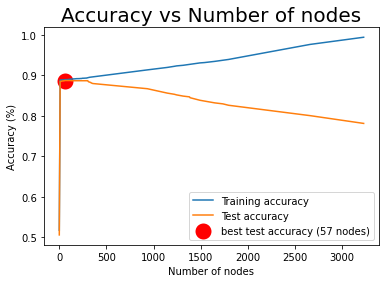

In [35]:
tree_post_pruning, highest_testing_accuracy = post_pruning(best_test_tree, X_train, X_test)

In [36]:
print(f'tree_post_pruning accuracy = {calc_accuracy(tree_post_pruning, X_test) * 100}%')

tree_post_pruning accuracy = 88.72476612506155%


In [37]:
count_nodes(tree_post_pruning)

57

In [38]:
def calcualte_max_tree_depth(node):
    if len(node.children) == 0:
        return 0
    else:
        depths = [0]
        
        for child in node.children:
            depths.append(calcualte_max_tree_depth(child))

    return max(depths) + 1

1 3227 10
0.5 1906 10
0.25 309 9
0.1 86 6
0.05 45 4
0.0001 1 0
[[1, 10], [0.5, 10], [0.25, 9], [0.1, 6], [0.05, 4], [0.0001, 0]]


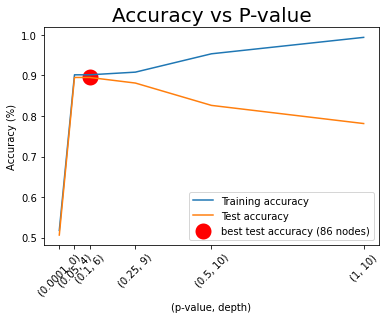

In [39]:
tuples = []
trees = []
train_accuracies = []
test_accuracies = []

p_values = [1, 0.5, 0.25, 0.1, 0.05, 0.0001]

for p in p_values:
    tree = build_tree(data=X_train, impurity=calc_entropy, chi=p)
    number_of_nodes = count_nodes(tree)
    depth = calcualte_max_tree_depth(tree)
    trees.extend([tree])
    train_accuracies.append(calc_accuracy(tree, X_train))
    test_accuracies.append(calc_accuracy(tree, X_test))
    tuples.append([p, depth])
    print(p, number_of_nodes, depth)


best_p_value_index_on_test_data = np.argmax(test_accuracies)
tree_chi = trees[best_p_value_index_on_test_data]

# print(tree_chi)
print(tuples)

plt.plot(p_values, train_accuracies, label='Training accuracy')
plt.plot(p_values, test_accuracies, label='Test accuracy')
plt.scatter(p_values[best_p_value_index_on_test_data], test_accuracies[best_p_value_index_on_test_data], 
            linewidths=10, color='red', label=f'best test accuracy ({count_nodes(tree_chi)} nodes)')

plt.title('Accuracy vs P-value', fontsize=20)
plt.xlabel('(p-value, depth)')
plt.ylabel('Accuracy (%)')
plt.xticks(p_values, [f'({tuples[i][0]}, {tuples[i][1]})' for i in range(len(tuples))], rotation=45)

plt.legend()
plt.show()

In [40]:
print(f'Best chi_tree test accuracy: {calc_accuracy(tree_chi, X_test) * 100}%')

Best chi_tree test accuracy: 89.51255539143278%


---

## Number of Nodes

Of the two trees above we will choose the one with fewer nodes. Complete the function counts_nodes and print the number of nodes in each tree. (5 points) 

In [41]:
# Implemented above as a helper function for the post_pruning function

---

## Print the tree

Complete the function `print_tree` and execute it on your chosen tree. Your tree should be visualized clearly. You can use the following example as a reference:
```
[ROOT, feature=X0],
  [X0=a, feature=X2]
    [X2=c, leaf]: [{1.0: 10}]
    [X2=d, leaf]: [{0.0: 10}]
  [X0=y, feature=X5], 
    [X5=a, leaf]: [{1.0: 5}]
    [X5=s, leaf]: [{0.0: 10}]
  [X0=e, leaf]: [{0.0: 25, 1.0: 50}]
```
In each brackets:
* The first argument is the parent feature with the value that led to current node
* The second argument is the selected feature of the current node
* If the current node is a leaf, you need to print also the labels and their counts

(5 points)

In [42]:
# you can change the function signeture
def print_tree(node, depth=0, parent_feature='ROOT', feature_val='ROOT'):
    '''
    prints the tree according to the example above

    Input:
    - node: a node in the decision tree

    This function has no return value
    '''

    if node.get_is_leaf():
        print(depth *' ' + f'[X{node.parent}={node.feature_name}, leaf]: [{node.class_counts}]')
    else:
        print(depth *' ' + f'[X{node.parent}={node.feature_name}, feature=X{node.feature}]')

        for n in node.children:
            print_tree(n, depth + 1)

In [43]:
print_tree(tree_post_pruning)

[X-1=ROOT, feature=X4]
 [X4=a, leaf]: [{'e': 273, 'p': 31}]
 [X4=c, leaf]: [{'e': 10, 'p': 137}]
 [X4=f, leaf]: [{'e': 170, 'p': 1438}]
 [X4=l, leaf]: [{'e': 272, 'p': 27}]
 [X4=m, feature=X0]
  [X0=f, feature=X2]
   [X2=c, feature=X5]
    [X5=a, leaf]: [{'p': 2}]
    [X5=f, leaf]: [{'e': 1}]
   [X2=e, leaf]: [{'p': 4}]
   [X2=n, leaf]: [{'p': 2}]
  [X0=k, leaf]: [{'e': 1, 'p': 10}]
  [X0=x, leaf]: [{'p': 7}]
 [X4=n, leaf]: [{'e': 2332, 'p': 344}]
 [X4=p, leaf]: [{'e': 8, 'p': 175}]
 [X4=s, feature=X13]
  [X13=p, feature=X11]
   [X11=k, feature=X20]
    [X20=d, leaf]: [{'e': 3, 'p': 31}]
    [X20=l, leaf]: [{'e': 4, 'p': 30}]
    [X20=p, feature=X0]
     [X0=f, leaf]: [{'p': 12}]
     [X0=k, leaf]: [{'p': 12}]
     [X0=x, feature=X1]
      [X1=s, leaf]: [{'p': 7}]
      [X1=y, feature=X2]
       [X2=e, leaf]: [{'p': 3}]
       [X2=n, feature=X10]
        [X10=k, leaf]: [{'e': 1}]
        [X10=s, leaf]: [{'p': 1}]
   [X11=s, leaf]: [{'e': 4, 'p': 94}]
  [X13=w, feature=X12]
   [X12=p, f

In [44]:
print_tree(tree_chi)

[X-1=ROOT, feature=X4]
 [X4=a, leaf]: [{'e': 273, 'p': 31}]
 [X4=c, leaf]: [{'e': 10, 'p': 137}]
 [X4=f, leaf]: [{'e': 170, 'p': 1438}]
 [X4=l, feature=X1]
  [X1=f, leaf]: [{'e': 19, 'p': 1}]
  [X1=s, leaf]: [{'e': 94, 'p': 16}]
  [X1=y, leaf]: [{'e': 159, 'p': 10}]
 [X4=m, leaf]: [{'e': 2, 'p': 25}]
 [X4=n, feature=X18]
  [X18=b, leaf]: [{'e': 34, 'p': 2}]
  [X18=h, feature=X2]
   [X2=r, leaf]: [{'e': 9, 'p': 4}]
   [X2=u, leaf]: [{'e': 14}]
   [X2=w, leaf]: [{'e': 12, 'p': 1}]
  [X18=k, leaf]: [{'e': 875, 'p': 96}]
  [X18=n, feature=X8]
   [X8=g, leaf]: [{'e': 9, 'p': 1}]
   [X8=h, leaf]: [{'e': 68, 'p': 8}]
   [X8=k, leaf]: [{'e': 79, 'p': 7}]
   [X8=n, leaf]: [{'e': 236, 'p': 24}]
   [X8=o, leaf]: [{'e': 12}]
   [X8=p, feature=X2]
    [X2=e, leaf]: [{'e': 45, 'p': 4}]
    [X2=g, feature=X1]
     [X1=f, leaf]: [{'e': 47}]
     [X1=s, feature=X10]
      [X10=f, leaf]: [{'e': 6}]
      [X10=s, leaf]: [{'e': 2, 'p': 2}]
     [X1=y, feature=X13]
      [X13=g, leaf]: [{'e': 10}]
      [X